<a href="https://colab.research.google.com/github/carypai/OpenVINO_Tour/blob/master/Open_Source_OpenVINO_R5_Running_Caffe_Mobilenet_SSD_Pretrained_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#This Colab will go throurh steps of using Open Source OpenVINO Toolkit  Deep Learning Deployment Toolkit to 
#1. Convert Caffe Pre-trained MobileNetSSD model to Intermediate Representive (IR) files by Model Optimizer
# 2. Run Inference Engine object_detect_demo_ssd sample using converted IR files
# 3. Generate Integer 8-bit IR files and run Inference Engine object_detect_demo_ssd sample to test Int8 inference



In [0]:
!git clone https://github.com/opencv/dldt.git

Cloning into 'dldt'...
remote: Enumerating objects: 11117, done.
remote: Total 11117 (delta 0), reused 0 (delta 0), pack-reused 11117
Receiving objects: 100% (11117/11117), 56.47 MiB | 18.36 MiB/s, done.
Resolving deltas: 100% (5087/5087), done.


In [0]:
cd /content/dldt/model-optimizer/install_prerequisites

/content/dldt/model-optimizer/install_prerequisites


In [0]:
!./install_prerequisites.sh

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1710/x86_64  InRelease
Get:2 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1710/x86_64  Release
Get:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  Release [564 B]
Get:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  Release.gpg [801 B]
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  Packages [37.1 kB]
Get:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic/main amd64 Packa

In [0]:
cd /content/dldt/model-optimizer

/content/dldt/model-optimizer


In [0]:
!python mo.py -h

usage: mo.py [-h] [--framework {tf,caffe,mxnet,kaldi,onnx}]
             [--input_model INPUT_MODEL] [--model_name MODEL_NAME]
             [--output_dir OUTPUT_DIR] [--input_shape INPUT_SHAPE]
             [--scale SCALE] [--reverse_input_channels]
             [--log_level {CRITICAL,ERROR,WARN,WARNING,INFO,DEBUG,NOTSET}]
             [--input INPUT] [--output OUTPUT] [--mean_values MEAN_VALUES]
             [--scale_values SCALE_VALUES]
             [--data_type {FP16,FP32,half,float}] [--disable_fusing]
             [--disable_resnet_optimization]
             [--finegrain_fusing FINEGRAIN_FUSING] [--disable_gfusing]
             [--move_to_preprocess] [--extensions EXTENSIONS] [--batch BATCH]
             [--version] [--silent]
             [--freeze_placeholder_with_value FREEZE_PLACEHOLDER_WITH_VALUE]
             [--generate_deprecated_IR_V2] [--input_model_is_text]
             [--input_checkpoint INPUT_CHECKPOINT]
             [--input_meta_graph INPUT_META_GRAPH]
            

In [0]:
cd /content

/content


In [0]:
!wget https://raw.githubusercontent.com/chuanqi305/MobileNet-SSD/ba00fc987b3eb0ba87bb99e89bf0298a2fd10765/MobileNetSSD_deploy.prototxt

--2019-01-31 03:17:28--  https://raw.githubusercontent.com/chuanqi305/MobileNet-SSD/ba00fc987b3eb0ba87bb99e89bf0298a2fd10765/MobileNetSSD_deploy.prototxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29353 (29K) [text/plain]
Saving to: ‘MobileNetSSD_deploy.prototxt’

MobileNetSSD_deploy 100%[===================>]  28.67K  --.-KB/s    in 0.02s   

2019-01-31 03:17:28 (1.83 MB/s) - ‘MobileNetSSD_deploy.prototxt’ saved [29353/29353]



In [0]:
!wget https://drive.google.com/uc?id=0B3gersZ2cHIxRm5PMWRoTkdHdHc&export=download

--2019-01-31 03:17:30--  https://drive.google.com/uc?id=0B3gersZ2cHIxRm5PMWRoTkdHdHc
Resolving drive.google.com (drive.google.com)... 74.125.141.100, 74.125.141.138, 74.125.141.101, ...
Connecting to drive.google.com (drive.google.com)|74.125.141.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-bs-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/3ha4am08elipcebel7lc8d680fnmtvrh/1548900000000/11769830311389405409/*/0B3gersZ2cHIxRm5PMWRoTkdHdHc [following]
--2019-01-31 03:17:31--  https://doc-0g-bs-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/3ha4am08elipcebel7lc8d680fnmtvrh/1548900000000/11769830311389405409/*/0B3gersZ2cHIxRm5PMWRoTkdHdHc
Resolving doc-0g-bs-docs.googleusercontent.com (doc-0g-bs-docs.googleusercontent.com)... 74.125.141.132, 2607:f8b0:400c:c06::84
Connecting to doc-0g-bs-docs.googleusercontent.com (doc-0g-bs-docs.googleusercontent.com)|74.125.141.132|:443..

In [0]:
!mv 'uc?id=0B3gersZ2cHIxRm5PMWRoTkdHdHc' MobileNetSSD_deploy.caffemodel

In [0]:
!ls -lah

total 23M
drwxr-xr-x 1 root root 4.0K Jan 31 03:17 .
drwxr-xr-x 1 root root 4.0K Jan 31 03:13 ..
-rw-r--r-- 1 root root 121K Jan 31 03:16 004545.jpg
drwxr-xr-x 1 root root 4.0K Jan 28 17:05 .config
drwxr-xr-x 5 root root 4.0K Jan 31 03:16 dldt
-rw-r--r-- 1 root root  23M Jan 31 03:17 MobileNetSSD_deploy.caffemodel
-rw-r--r-- 1 root root  29K Jan 31 03:17 MobileNetSSD_deploy.prototxt
drwxr-xr-x 1 root root 4.0K Jan 29 17:09 sample_data


In [0]:
cd /content/dldt/model-optimizer

/content/dldt/model-optimizer


In [0]:
!python ./mo.py --framework caffe --input_shape [1,3,300,300] --input data --mean_values [127.5,127.5,127.5] --scale_values [127.50223128904757] --output detection_out --input_model /content/MobileNetSSD_deploy.caffemodel --output_dir /content/MobileNetSSD_FP32

Model Optimizer arguments:
Common parameters:
	- Path to the Input Model: 	/content/MobileNetSSD_deploy.caffemodel
	- Path for generated IR: 	/content/MobileNetSSD_FP16
	- IR output name: 	MobileNetSSD_deploy
	- Log level: 	ERROR
	- Batch: 	Not specified, inherited from the model
	- Input layers: 	data
	- Output layers: 	detection_out
	- Input shapes: 	[1,3,300,300]
	- Mean values: 	[127.5,127.5,127.5]
	- Scale values: 	[127.50223128904757]
	- Scale factor: 	Not specified
	- Precision of IR: 	FP32
	- Enable fusing: 	True
	- Enable grouped convolutions fusing: 	True
	- Move mean values to preprocess section: 	False
	- Reverse input channels: 	False
Caffe specific parameters:
	- Enable resnet optimization: 	True
	- Path to the Input prototxt: 	/content/MobileNetSSD_deploy.prototxt
	- Path to CustomLayersMapping.xml: 	Default
	- Path to a mean file: 	Not specified
	- Offsets for a mean file: 	Not specified
Model Optimizer version: 	1.5.12.49d067a0
[ ERROR ]  ------------------------------

# **Looks like generator python package doesn't exit?**

dldt/model-optimizer$ grep -r "from generator" *

extensions/front/tf/stop_gradient_ext_test.py:from generator import generator, generate

extensions/front/onnx/flatten_ext_test.py:from generator import generator, generate

extensions/front/onnx/unsqueeze_ext_test.py:from generator import generator, generate

extensions/front/onnx/slice_ext_test.py:from generator import generator, generate

extensions/front/onnx/squeeze_ext_test.py:from generator import generator, generate

extensions/front/onnx/elu_ext_test.py:from generator import generator, generate

extensions/front/onnx/transpose_ext_test.py:from generator import generator, generate

extensions/front/onnx/gather_ext_test.py:from generator import generator, generate

mo/ops/slice_test.py:from generator import generator

mo/ops/flatten_onnx_test.py:from generator import generator, generate

mo/ops/permute_test.py:from generator import generator, generate

mo/ops/unsqueeze_test.py:from generator import generator

mo/front/extractor_test.py:from generator import generator, generate

mo/front/tf/loader_test.py:from generator import generate, generator

mo/front/tf/extractors/eltwise_test.py:from generator import generator, generate

mo/front/tf/extractors/const_test.py:from generator import generator, generate

mo/front/onnx/extractors/constant_test.py:from generator import generator, generate

mo/pipeline/common_test.py:from generator import generator, generate

In [0]:
!mkdir /content/test

In [0]:
!mv /content/dldt/model-optimizer/mo/ops/*_test* /content/test/

In [0]:
!mv /content/dldt/model-optimizer/mo/front/extractor_test.py /content/test

In [0]:
!mv /content/dldt/model-optimizer/mo/front/tf/loader_test.py /content/test

In [0]:
!mv /content/dldt/model-optimizer/mo/front/tf/extractors/const_test.py /content/test

In [0]:
!mv /content/dldt/model-optimizer/mo/front/tf/extractors/eltwise_test.py /content/test

In [0]:
!mv /content/dldt/model-optimizer/extensions/front/tf/stop_gradient_ext_test.py /content/test

In [0]:
!python ./mo.py --framework caffe --input_shape [1,3,300,300] --input data --mean_values [127.5,127.5,127.5] --scale_values [127.50223128904757] --output detection_out --input_model /content/MobileNetSSD_deploy.caffemodel --output_dir /content/MobileNetSSD_FP32

Model Optimizer arguments:
Common parameters:
	- Path to the Input Model: 	/content/MobileNetSSD_deploy.caffemodel
	- Path for generated IR: 	/content/MobileNetSSD_FP32
	- IR output name: 	MobileNetSSD_deploy
	- Log level: 	ERROR
	- Batch: 	Not specified, inherited from the model
	- Input layers: 	data
	- Output layers: 	detection_out
	- Input shapes: 	[1,3,300,300]
	- Mean values: 	[127.5,127.5,127.5]
	- Scale values: 	[127.50223128904757]
	- Scale factor: 	Not specified
	- Precision of IR: 	FP32
	- Enable fusing: 	True
	- Enable grouped convolutions fusing: 	True
	- Move mean values to preprocess section: 	False
	- Reverse input channels: 	False
Caffe specific parameters:
	- Enable resnet optimization: 	True
	- Path to the Input prototxt: 	/content/MobileNetSSD_deploy.prototxt
	- Path to CustomLayersMapping.xml: 	Default
	- Path to a mean file: 	Not specified
	- Offsets for a mean file: 	Not specified
Model Optimizer version: 	1.5.12.49d067a0

[ SUCCESS ] Generated IR model.
[ SUCCES

In [0]:
!ls -l /content/MobileNetSSD_FP32/

total 22676
-rw-r--r-- 1 root root 23133692 Jan 31 05:36 MobileNetSSD_deploy.bin
-rw-r--r-- 1 root root    15926 Jan 31 05:36 MobileNetSSD_deploy.mapping
-rw-r--r-- 1 root root    67529 Jan 31 05:36 MobileNetSSD_deploy.xml


In [0]:
cd /content/dldt/inference-engine

/content/dldt/inference-engine


In [0]:
!git submodule init

Submodule 'inference-engine/thirdparty/ade' (https://github.com/opencv/ade.git) registered for path 'thirdparty/ade'


In [0]:
!git submodule update --recursive

Cloning into '/content/dldt/inference-engine/thirdparty/ade'...
Submodule path 'thirdparty/ade': checked out '562e301ccc8327e4016ccc3f1bc3a8592f50ea21'


In [0]:
!mkdir build

In [0]:
cd /content/dldt/inference-engine/build

/content/dldt/inference-engine/build


In [0]:
!cmake -DCMAKE_BUILD_TYPE=Release ..

-- The C compiler identification is GNU 7.3.0
-- The CXX compiler identification is GNU 7.3.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Looking for C++ include sys/types.h
-- Looking for C++ include sys/types.h - found
-- Looking for C++ include stdint.h
-- Looking for C++ include stdint.h - found
-- Looking for C++ include stddef.h
-- Looking for C++ include stddef.h - found
-- Check size of uint32_t
-- Check size of uint32_t - done
-- BUILD_CONFIGURATION: Release
-- GEMM should be set to MKL, OPENBLAS or JIT. Default option is JIT


In [0]:
!lscpu

Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
CPU(s):              2
On-line CPU(s) list: 0,1
Thread(s) per core:  2
Core(s) per socket:  1
Socket(s):           1
NUMA node(s):        1
Vendor ID:           GenuineIntel
CPU family:          6
Model:               63
Model name:          Intel(R) Xeon(R) CPU @ 2.30GHz
Stepping:            0
CPU MHz:             2300.000
BogoMIPS:            4600.00
Hypervisor vendor:   KVM
Virtualization type: full
L1d cache:           32K
L1i cache:           32K
L2 cache:            256K
L3 cache:            46080K
NUMA node0 CPU(s):   0,1
Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single pti ssbd i

In [0]:
!make -j2

Scanning dependencies of target pugixml
Scanning dependencies of target ade
[  0%] Building CXX object thirdparty/pugixml/CMakeFiles/pugixml.dir/src/pugixml.cpp.o
[  1%] Building CXX object thirdparty/ade/sources/ade/CMakeFiles/ade.dir/source/alloc.cpp.o
[  1%] Building CXX object thirdparty/ade/sources/ade/CMakeFiles/ade.dir/source/assert.cpp.o
[  1%] Building CXX object thirdparty/ade/sources/ade/CMakeFiles/ade.dir/source/check_cycles.cpp.o
[  1%] Building CXX object thirdparty/ade/sources/ade/CMakeFiles/ade.dir/source/edge.cpp.o
[  1%] Building CXX object thirdparty/ade/sources/ade/CMakeFiles/ade.dir/source/execution_engine.cpp.o
[  1%] Building CXX object thirdparty/ade/sources/ade/CMakeFiles/ade.dir/source/graph.cpp.o
[  1%] Building CXX object thirdparty/ade/sources/ade/CMakeFiles/ade.dir/source/memory_accessor.cpp.o
[  1%] Building CXX object thirdparty/ade/sources/ade/CMakeFiles/ade.dir/source/memory_descriptor.cpp.o
[  1%] Linking CXX static library ../../../bin/intel64/Releas

In [0]:
cd /content

/content


In [0]:
!wget https://github.com/chuanqi305/MobileNet-SSD/raw/master/images/004545.jpg

--2019-01-31 04:03:58--  https://github.com/chuanqi305/MobileNet-SSD/raw/master/images/004545.jpg
Resolving github.com (github.com)... 192.30.253.113, 192.30.253.112
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/chuanqi305/MobileNet-SSD/master/images/004545.jpg [following]
--2019-01-31 04:03:58--  https://raw.githubusercontent.com/chuanqi305/MobileNet-SSD/master/images/004545.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 123072 (120K) [image/jpeg]
Saving to: ‘004545.jpg.1’

004545.jpg.1        100%[===================>] 120.19K  --.-KB/s    in 0.05s   

2019-01-31 04:03:58 (2.27 MB/s) - ‘004545.jpg.1’ saved [123072/123072]



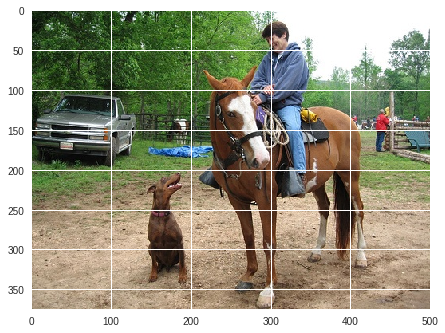

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("/content/004545.jpg")
img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.show()

In [0]:
cd /content/dldt/inference-engine/bin/intel64/Release

/content/dldt/inference-engine/bin/intel64/Release


In [0]:
!./object_detection_sample_ssd -i /content/004545.jpg -m /content/MobileNetSSD_FP32/MobileNetSSD_deploy.xml

[ INFO ] InferenceEngine: 
	API version ............ 1.4
	Build .................. custom_2018_17e66dc5a6631d630da454506902bd7c25d4170b
Parsing input parameters
[ INFO ] Files were added: 1
[ INFO ]     /content/004545.jpg
[ INFO ] Loading plugin

	API version ............ 1.5
	Build .................. custom_2018_17e66dc5a6631d630da454506902bd7c25d4170b
	Description ....... MKLDNNPlugin
[ INFO ] Loading network files:
	/content/MobileNetSSD_FP32/MobileNetSSD_deploy.xml
	/content/MobileNetSSD_FP32/MobileNetSSD_deploy.bin
[ INFO ] Preparing input blobs
[ INFO ] Batch size is 1
[ INFO ] Preparing output blobs
[ INFO ] Loading model to the plugin
[ WARNING ] Image is resized from (500, 375) to (300, 300)
[ INFO ] Batch size is 1
[ INFO ] Start inference (1 iterations)
[ INFO ] Processing output blobs
[0,3] element, prob = 0.460032    (143.772,201.257)-(198.6,343.972) batch id : 0
[1,7] element, prob = 0.992733    (4.3151,104.477)-(131.6,196.201) batch id : 0 WILL BE PRINTED!
[2,12] elemen

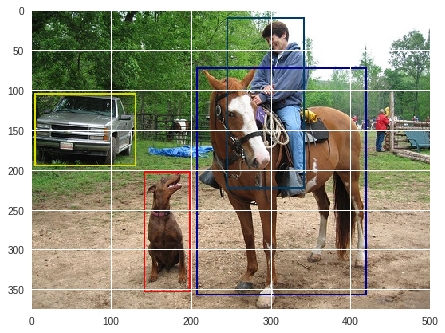

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("./out_0.bmp")
img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.show()

# Prepared VOC Pascal dataset for IE validation tool


In [0]:
!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtest_06-Nov-2007.tar

--2019-01-31 05:44:39--  http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtest_06-Nov-2007.tar
Resolving host.robots.ox.ac.uk (host.robots.ox.ac.uk)... 129.67.94.152
Connecting to host.robots.ox.ac.uk (host.robots.ox.ac.uk)|129.67.94.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 451020800 (430M) [application/x-tar]
Saving to: ‘VOCtest_06-Nov-2007.tar’

VOCtest_06-Nov-2007 100%[===================>] 430.13M  13.7MB/s    in 33s     

2019-01-31 05:45:13 (13.2 MB/s) - ‘VOCtest_06-Nov-2007.tar’ saved [451020800/451020800]



In [0]:
!tar xf VOCtest_06-Nov-2007.tar

In [0]:
!rm VOC_SSD_Classes.txt
!echo "none_of_the_above 0" > VOC_SSD_Classes.txt
!echo "aeroplane 1" >> VOC_SSD_Classes.txt
!echo "bicycle 2" >> VOC_SSD_Classes.txt
!echo "bird 3" >> VOC_SSD_Classes.txt
!echo "boat 4" >> VOC_SSD_Classes.txt
!echo "bottle 5" >> VOC_SSD_Classes.txt
!echo "bus 6" >> VOC_SSD_Classes.txt
!echo "car 7" >> VOC_SSD_Classes.txt
!echo "cat 8" >> VOC_SSD_Classes.txt
!echo "chair 9" >> VOC_SSD_Classes.txt
!echo "cow 10" >> VOC_SSD_Classes.txt
!echo "diningtable 11" >> VOC_SSD_Classes.txt
!echo "dog 12" >> VOC_SSD_Classes.txt
!echo "horse 13" >> VOC_SSD_Classes.txt
!echo "motorbike 14" >> VOC_SSD_Classes.txt
!echo "person 15" >> VOC_SSD_Classes.txt
!echo "pottedplant 16" >> VOC_SSD_Classes.txt
!echo "sheep 17" >> VOC_SSD_Classes.txt
!echo "sofa 18" >> VOC_SSD_Classes.txt
!echo "train 19" >> VOC_SSD_Classes.txt
!echo "tvmonitor 20" >> VOC_SSD_Classes.txt

In [0]:
!cat VOC_SSD_Classes.txt

none_of_the_above 0
aeroplane 1
bicycle 2
bird 3
boat 4
bottle 5
bus 6
car 7
cat 8
chair 9
cow 10
diningtable 11
dog 12
horse 13
motorbike 14
person 15
pottedplant 16
sheep 17
sofa 18
train 19
tvmonitor 20


In [0]:
!./calibration_tool -h

[ INFO ] InferenceEngine: 
	API version ............ 1.4
	Build .................. custom_2018_17e66dc5a6631d630da454506902bd7c25d4170b
[ INFO ] Parsing input parameters

Usage: calibration_tool [OPTION]

Available options:

    -h                        Print a help message
    -t <type>                 Type of an inferred network ("C" by default)
      -t "C" to calibrate Classification network and write the calibrated network to IR
      -t "OD" to calibrate Object Detection network and write the calibrated network to IR
      -t "RawC" to collect only statistics for Classification network and write statistics to IR. With this option, a model is not calibrated. For calibration and statisctics collection, use "-t C" instead.
      -t "RawOD" to collect only statistics for Object Detection network and write statistics to IR. With this option, a model is not calibrated. For calibration and statisctics collection, use "-t OD" instead
    -i <path>                 Required. Path to a dir

In [0]:
!./calibration_tool -d CPU -t OD -ODa ./VOCdevkit/VOC2007/Annotations -i ./VOCdevkit -m /content/MobileNetSSD_FP32/MobileNetSSD_deploy.xml -ODc ./VOC_SSD_Classes.txt -ODsubdir JPEGImages -subset 500

[ INFO ] InferenceEngine: 
	API version ............ 1.4
	Build .................. custom_2018_17e66dc5a6631d630da454506902bd7c25d4170b
[ INFO ] Parsing input parameters
[ INFO ] Loading plugin

	API version ............ 1.5
	Build .................. custom_2018_17e66dc5a6631d630da454506902bd7c25d4170b
	Description ....... MKLDNNPlugin
[ INFO ] Loading network files
[ INFO ] Preparing input blobs
[ INFO ] Batch size is 1
[ INFO ] Collecting accuracy metric in FP32 mode to get a baseline, collecting activation statistics
Progress: [....................] 100.00% done
  FP32 Accuracy: 68.27% 
[ INFO ] Verification of network accuracy if all possible layers converted to INT8
Validate int8 accuracy, threshold for activation statistics = 100.00
Progress: [....................] 100.00% done
   Accuracy is 59.23%
Validate int8 accuracy, threshold for activation statistics = 99.50
Progress: [....................] 100.00% done
   Accuracy is 59.10%
Validate int8 accuracy, threshold for activatio

In [0]:
!ls /content/MobileNetSSD_FP32/

MobileNetSSD_deploy.bin     MobileNetSSD_deploy.mapping
MobileNetSSD_deploy_i8.bin  MobileNetSSD_deploy.xml
MobileNetSSD_deploy_i8.xml


In [0]:
!./object_detection_sample_ssd -i /content/004545.jpg -m /content/MobileNetSSD_FP32/MobileNetSSD_deploy_i8.xml

[ INFO ] InferenceEngine: 
	API version ............ 1.4
	Build .................. custom_2018_17e66dc5a6631d630da454506902bd7c25d4170b
Parsing input parameters
[ INFO ] Files were added: 1
[ INFO ]     /content/004545.jpg
[ INFO ] Loading plugin

	API version ............ 1.5
	Build .................. custom_2018_17e66dc5a6631d630da454506902bd7c25d4170b
	Description ....... MKLDNNPlugin
[ INFO ] Loading network files:
	/content/MobileNetSSD_FP32/MobileNetSSD_deploy_i8.xml
	/content/MobileNetSSD_FP32/MobileNetSSD_deploy_i8.bin
[ INFO ] Preparing input blobs
[ INFO ] Batch size is 1
[ INFO ] Preparing output blobs
[ INFO ] Loading model to the plugin
[ WARNING ] Image is resized from (500, 375) to (300, 300)
[ INFO ] Batch size is 1
[ INFO ] Start inference (1 iterations)
[ INFO ] Processing output blobs
[0,3] element, prob = 0.522848    (143.782,201.043)-(198.628,344.039) batch id : 0 WILL BE PRINTED!
[1,7] element, prob = 0.993113    (4.68373,104.373)-(131.606,195.681) batch id : 0 WI

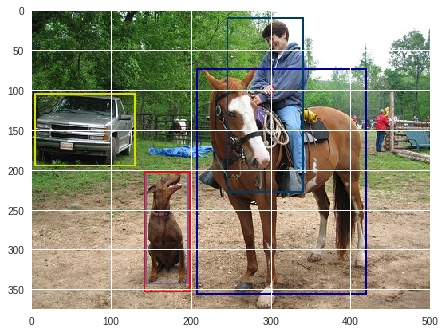

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("./out_0.bmp")
img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.show()

# If you have google drive, use code below to mount it at /content/gdrive and then copy generated IR files to google drive for storage.

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
!cp /content/MobileNetSSD_FP32/MobileNetSSD_deploy_i8.xml /content/gdrive/

#IR files can be downloaded also

In [0]:
files.download('/content/MobileNetSSD_FP32/MobileNetSSD_deploy.xml')

In [0]:
files.download('/content/MobileNetSSD_FP32/MobileNetSSD_deploy.bin')

In [0]:
files.download('/content/MobileNetSSD_FP32/MobileNetSSD_deploy.mapping')

** This notebook provides recipes for loading and saving data from external sources. **

https://colab.research.google.com/notebooks/io.ipynb